In [2]:
import os
import json
import pandas as pd

## old new text 분할

In [3]:
# List all files in the './data/training' directory
files = os.listdir('./data/training')

# Filter for JSON files
json_files = [file for file in files if file.endswith('.json')]

# Read the first JSON file
if json_files:
    first_json_file_path = os.path.join('./data/training', json_files[0])
    with open(first_json_file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)
    result = {"status": "success", "file_path": first_json_file_path, "data": data}
else:
    result = {"status": "error", "message": "No JSON files found in the directory."}

result

{'status': 'success',
 'file_path': './data/training/REPORT-literature-03971-03971.json',
 'data': {'Meta(Acqusition)': {'doc_id': 'REPORT-literature-03971',
   'doc_category': 'REPORT',
   'doc_type': 'literature',
   'doc_name': '보석반지',
   'author': '최서해',
   'publisher': None,
   'publisher_year': None,
   'doc_origin': '저작권위원회'},
  'Meta(Refine)': {'passage_id': 'REPORT-literature-03971-03971',
   'passage': ' 나는 그 모든 소리를 들을 때에 꽃다운 혜경의 장래에 대한 동정심과 아울 러 최 목사와 그 남자의 추행에 대한 의분과 질투에 끓었다. “혼례식은 언제 하나?” “이제 앞으로 한 달 반쯤 남았어요. 오월 열 이튿날이라니까……. 그래서 그 준비 때문에 졸업식 전에 먼저 나왔대요.” 나는 무어라고 형언할 수 없는 기분에 싸였다. 혜경이와 아무 관계도 없건 마는 그가 불원간 떠나게 된다는 것이 내게는 말할 수 없이 쓸쓸하였다. 어 째서 쓸쓸한지 나로도 알 수 없었다. ‘단념! 단념! 모든 것을 단념! 하자! 내가 왜 이럴까?’ 나는 그와 같은 아내를 가질 자격도 없거니와 더구나 그는 결혼한 여자 다……. 그러나 다만 누이로라도 사랑한다면. 나는 얼토당토않은 이런 생각 으로 밤잠을 못 이루었다. 이튿날부터 나는 혜경이를 자주 보게 되었다. 나는 그와 마주칠 때마다 부 드러운 느낌을 받으면서도 수줍고 부끄러워서 그의 낯을 똑똑히 바라보지 못하였다. 나뿐이 아니라 혜경이도 나를 똑바로 쳐다보지 않았다. 혹 내가 마당에서 거닐거나 무엇을 할 때에 그의 방문이 열렸거나 그가 마당에 나섰 거나 하면 나는 그를 등지고 돌아보지 않았다. 그리고 내

In [4]:
json_data = []

for file in json_files :
    json_file_path = os.path.join('./data/training', file)
    with open(json_file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)
    result = {"status": "success", "file_path": json_file_path, "data": data}
    json_data.append(result)

print(len(json_data))

4800


In [5]:
# Creating a DataFrame from the passage parts
df_passages = pd.DataFrame({
    'file_path': [json_file['file_path'] for json_file in json_data],
    'passage': [json_file['data']['Meta(Refine)']['passage'] for json_file in json_data]
})

df_passages.head()

,file_path,passage
0,./data/training/REPORT-literature-03971-03971....,나는 그 모든 소리를 들을 때에 꽃다운 혜경의 장래에 대한 동정심과 아울 러 최 ...
1,./data/training/REPORT-literature-05509-05509....,불같이 급하고 서리같이 매서운 성질이면서 아울러 의리가 굳고 심히 호협 한 기개가 ...
2,./data/training/REPORT-literature-05964-05964....,정현웅 언젠가 미술연구소에서 모델 구한다는 광고를 신문에 냈더니만 어떤 내지 여자...
3,./data/training/REPORT-literature-02049-02049....,"“네. 며칠 전에 거리에 서 있노라니깐 지나가는 사람들의 이야기에, 아버 님께서 ..."
4,./data/training/REPORT-literature-02070-02070....,9 밤 이경 때에 차돌이놈이 무엇인지 보꾸러미를 어깨에 메고 왔다. 배비장은 의관을...


In [6]:
df_passages.shape

(4800, 2)

In [7]:
# '\n'을 ' '로 변경
df_passages['passage'] = df_passages['passage'].str.replace('\n', ' ', regex=False)

In [8]:
#passage 열이름을 new로 변경
df_passages.rename(columns={'passage': 'new'}, inplace=True)

df_passages.head()

,file_path,new
0,./data/training/REPORT-literature-03971-03971....,나는 그 모든 소리를 들을 때에 꽃다운 혜경의 장래에 대한 동정심과 아울 러 최 ...
1,./data/training/REPORT-literature-05509-05509....,불같이 급하고 서리같이 매서운 성질이면서 아울러 의리가 굳고 심히 호협 한 기개가 ...
2,./data/training/REPORT-literature-05964-05964....,정현웅 언젠가 미술연구소에서 모델 구한다는 광고를 신문에 냈더니만 어떤 내지 여자...
3,./data/training/REPORT-literature-02049-02049....,"“네. 며칠 전에 거리에 서 있노라니깐 지나가는 사람들의 이야기에, 아버 님께서 ..."
4,./data/training/REPORT-literature-02070-02070....,9 밤 이경 때에 차돌이놈이 무엇인지 보꾸러미를 어깨에 메고 왔다. 배비장은 의관을...


In [9]:
# old 열의 텍스트에서 두 번째 마침표나 물음표가 나오는 곳까지 자르기.
# 이때 잘리는 부분이 따옴표 안에 있으면 따옴표 끝까지 포함해서 자르도록 구현
def extract_until_second_punctuation_including_quotes(text):
    punctuations = ['.', '?']
    punctuation_count = 0
    quote_open = False
    last_punctuation_inside_quotes = False

    for i, char in enumerate(text):
        if char == '“':
            quote_open = True
        elif char == '”':
            quote_open = False
            if last_punctuation_inside_quotes:
                return text[:i+1]
        elif char in punctuations:
            punctuation_count += 1
            if punctuation_count == 2:
                if not quote_open:
                    return text[:i+1]
                else:
                    last_punctuation_inside_quotes = True
    return text

df_passages['old'] = df_passages['new'].apply(extract_until_second_punctuation_including_quotes)

df_passages


,file_path,new,old
0,./data/training/REPORT-literature-03971-03971....,나는 그 모든 소리를 들을 때에 꽃다운 혜경의 장래에 대한 동정심과 아울 러 최 ...,나는 그 모든 소리를 들을 때에 꽃다운 혜경의 장래에 대한 동정심과 아울 러 최 ...
1,./data/training/REPORT-literature-05509-05509....,불같이 급하고 서리같이 매서운 성질이면서 아울러 의리가 굳고 심히 호협 한 기개가 ...,불같이 급하고 서리같이 매서운 성질이면서 아울러 의리가 굳고 심히 호협 한 기개가 ...
2,./data/training/REPORT-literature-05964-05964....,정현웅 언젠가 미술연구소에서 모델 구한다는 광고를 신문에 냈더니만 어떤 내지 여자...,정현웅 언젠가 미술연구소에서 모델 구한다는 광고를 신문에 냈더니만 어떤 내지 여자...
3,./data/training/REPORT-literature-02049-02049....,"“네. 며칠 전에 거리에 서 있노라니깐 지나가는 사람들의 이야기에, 아버 님께서 ...","“네. 며칠 전에 거리에 서 있노라니깐 지나가는 사람들의 이야기에, 아버 님께서 ..."
4,./data/training/REPORT-literature-02070-02070....,9 밤 이경 때에 차돌이놈이 무엇인지 보꾸러미를 어깨에 메고 왔다. 배비장은 의관을...,9 밤 이경 때에 차돌이놈이 무엇인지 보꾸러미를 어깨에 메고 왔다. 배비장은 의관을...
...,...,...,...
4795,./data/training/REPORT-literature-02067-02067....,“우리는 눈이 상하는 줄 알면서도 기름불이나 촛불보다 전깃불을 요구하 는 것과 마...,“우리는 눈이 상하는 줄 알면서도 기름불이나 촛불보다 전깃불을 요구하 는 것과 마...
4796,./data/training/REPORT-literature-03532-03532....,그의 눈은 연일 잠을 못 자서 벌겋게 충혈이 되고 눈곱이 다닥다닥 붙었 다. 비죽...,그의 눈은 연일 잠을 못 자서 벌겋게 충혈이 되고 눈곱이 다닥다닥 붙었 다. 비죽...
4797,./data/training/REPORT-literature-04072-04072....,“어째서 그래요? 내이 만일 선생를 죽였더라면 살인한 죄인이 될 터인데 마음의 구원...,“어째서 그래요? 내이 만일 선생를 죽였더라면 살인한 죄인이 될 터인데 마음의 구원...
4798,./data/training/REPORT-literature-03966-03966....,그 짙어 가는 추색(秋色)과 보조를 맞추듯이 백연숙과 영훈의 관계도 점점 깊어 가...,그 짙어 가는 추색(秋色)과 보조를 맞추듯이 백연숙과 영훈의 관계도 점점 깊어 가...


In [10]:
#csv파일로 저장
csv_file_path = './Data/training_old_new_data.csv'
df_passages.to_csv(csv_file_path, index=False)

## 추가된 길이 기준으로 100개 선정

In [13]:
# CSV 파일 경로
file_path = './Data/training_old_new_data.csv'

# CSV 파일을 데이터프레임으로 불러오기
data = pd.read_csv(file_path)

# 데이터프레임 출력
print(data)

                                              file_path  \
0     ./data/training/REPORT-literature-03971-03971....   
1     ./data/training/REPORT-literature-05509-05509....   
2     ./data/training/REPORT-literature-05964-05964....   
3     ./data/training/REPORT-literature-02049-02049....   
4     ./data/training/REPORT-literature-02070-02070....   
...                                                 ...   
4795  ./data/training/REPORT-literature-02067-02067....   
4796  ./data/training/REPORT-literature-03532-03532....   
4797  ./data/training/REPORT-literature-04072-04072....   
4798  ./data/training/REPORT-literature-03966-03966....   
4799  ./data/training/REPORT-literature-05973-05973....   

                                                    new  \
0      나는 그 모든 소리를 들을 때에 꽃다운 혜경의 장래에 대한 동정심과 아울 러 최 ...   
1     불같이 급하고 서리같이 매서운 성질이면서 아울러 의리가 굳고 심히 호협 한 기개가 ...   
2      정현웅 언젠가 미술연구소에서 모델 구한다는 광고를 신문에 냈더니만 어떤 내지 여자...   
3      “네. 며칠 전에 거리에 서 있노라니깐 지나가는 사람들의 이야기에, 아버 님께서 ...

최솟값: 6
최댓값: 983
평균값: 120.730625
중간값: 99.5


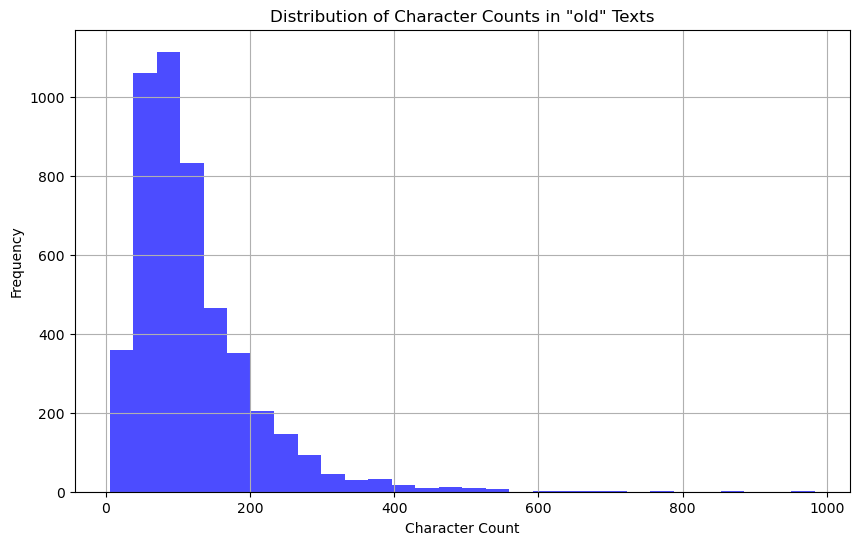

In [14]:
#old열 글자 수 시각화
import pandas as pd
import matplotlib.pyplot as plt

# 'old' 열의 각 텍스트의 글자 수를 계산
data['length'] = data['old'].apply(len)

# 최솟값, 최댓값, 평균, 중간값 출력
min_count = data['length'].min()
max_count = data['length'].max()
mean_count = data['length'].mean()
median_count = data['length'].median()

print(f"최솟값: {min_count}")
print(f"최댓값: {max_count}")
print(f"평균값: {mean_count}")
print(f"중간값: {median_count}")

# 글자 수의 분포를 히스토그램으로 시각화
plt.figure(figsize=(10, 6))
plt.hist(data['length'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Character Counts in "old" Texts')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

최솟값: 2
최댓값: 250
평균값: 30.547291666666666
중간값: 25.0


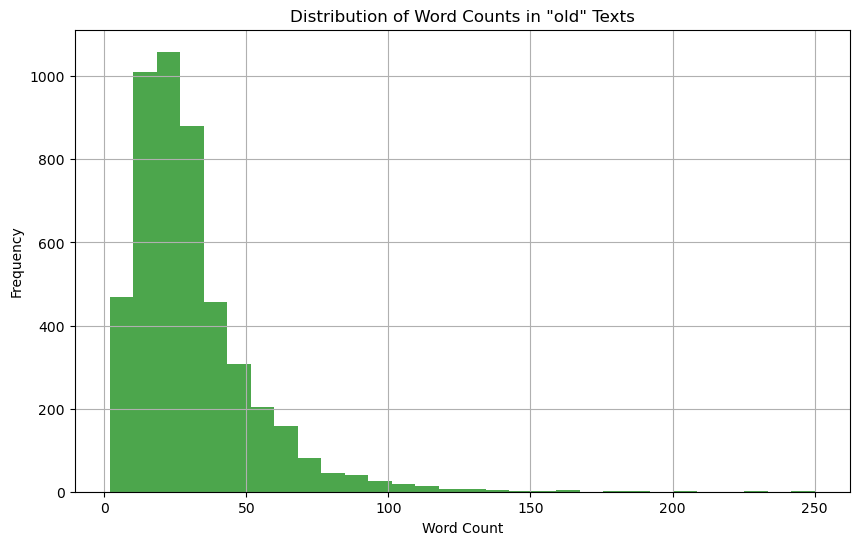

In [15]:
#old열 단어 수 시각화

# 'old' 열의 각 텍스트의 단어 수를 계산
data['word_count'] = data['old'].apply(lambda x: len(str(x).split()))

# 최솟값, 최댓값, 평균, 중간값 출력
min_count = data['word_count'].min()
max_count = data['word_count'].max()
mean_count = data['word_count'].mean()
median_count = data['word_count'].median()

print(f"최솟값: {min_count}")
print(f"최댓값: {max_count}")
print(f"평균값: {mean_count}")
print(f"중간값: {median_count}")

# 단어 수의 분포를 히스토그램으로 시각화
plt.figure(figsize=(10, 6))
plt.hist(data['word_count'], bins=30, color='green', alpha=0.7)
plt.title('Distribution of Word Counts in "old" Texts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

최솟값: 681
최댓값: 1500
평균값: 846.1791666666667
중간값: 800.0


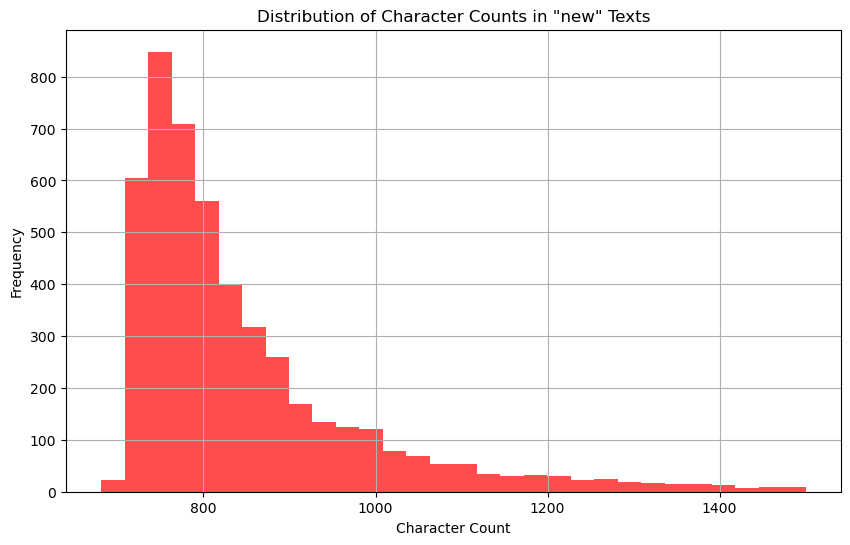

In [16]:
# 'new' 열의 각 텍스트의 글자 수를 계산
data['char_count_new'] = data['new'].apply(len)

# 최솟값, 최댓값, 평균, 중간값 출력
min_count = data['char_count_new'].min()
max_count = data['char_count_new'].max()
mean_count = data['char_count_new'].mean()
median_count = data['char_count_new'].median()

print(f"최솟값: {min_count}")
print(f"최댓값: {max_count}")
print(f"평균값: {mean_count}")
print(f"중간값: {median_count}")

# 글자 수의 분포를 히스토그램으로 시각화
plt.figure(figsize=(10, 6))
plt.hist(data['char_count_new'], bins=30, color='red', alpha=0.7)
plt.title('Distribution of Character Counts in "new" Texts')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

최솟값: 148
최댓값: 404
평균값: 214.969375
중간값: 204.0


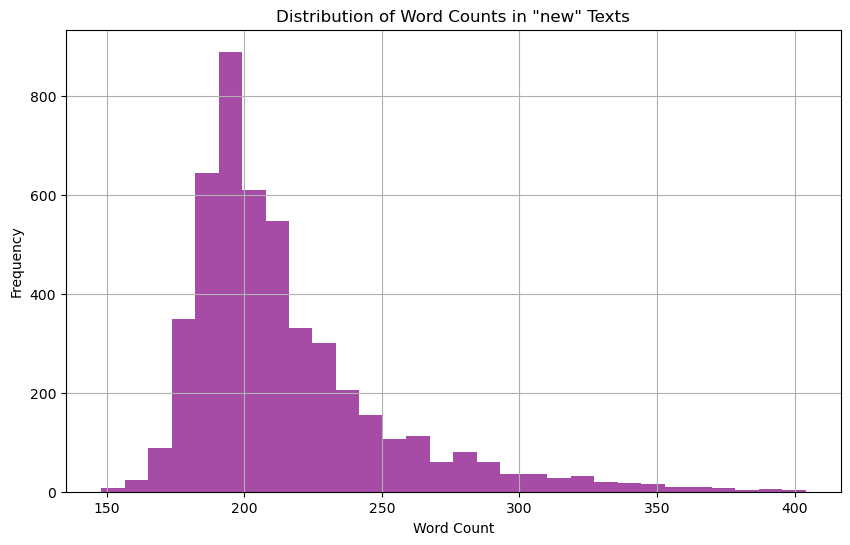

In [17]:
# 'new' 열의 각 텍스트의 단어 수를 계산
data['word_count_new'] = data['new'].apply(lambda x: len(str(x).split()))

# 최솟값, 최댓값, 평균, 중간값 출력
min_count = data['word_count_new'].min()
max_count = data['word_count_new'].max()
mean_count = data['word_count_new'].mean()
median_count = data['word_count_new'].median()

print(f"최솟값: {min_count}")
print(f"최댓값: {max_count}")
print(f"평균값: {mean_count}")
print(f"중간값: {median_count}")

# 단어 수의 분포를 히스토그램으로 시각화
plt.figure(figsize=(10, 6))
plt.hist(data['word_count_new'], bins=30, color='purple', alpha=0.7)
plt.title('Distribution of Word Counts in "new" Texts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

최솟값: 0
최댓값: 1430
평균값: 725.4485416666666
중간값: 701.0


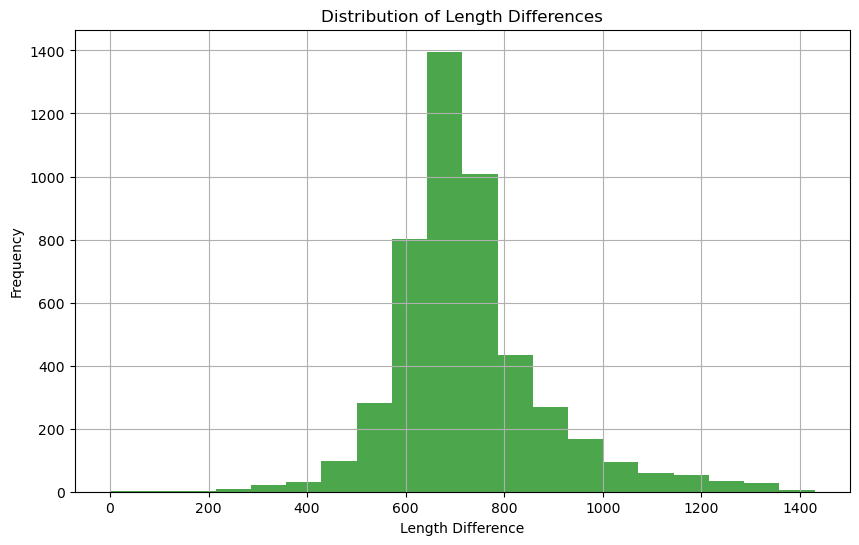

In [18]:
# 글자 수 차이 계산
data['char_count_difference'] = data['char_count_new'] - data['length']

# 글자 수 차이의 최솟값, 최댓값, 평균값, 중간값 출력
min_diff = data['char_count_difference'].min()
max_diff = data['char_count_difference'].max()
mean_diff = data['char_count_difference'].mean()
median_diff = data['char_count_difference'].median()

print(f"최솟값: {min_diff}")
print(f"최댓값: {max_diff}")
print(f"평균값: {mean_diff}")
print(f"중간값: {median_diff}")

# 글자 수 차이의 분포를 히스토그램으로 나타내기
plt.figure(figsize=(10, 6))
plt.hist(data['char_count_difference'], bins=20, color='green', alpha=0.7)
plt.title('Distribution of Length Differences')
plt.xlabel('Length Difference')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Minimum difference: 0
Maximum difference: 380
Average difference: 184.42208333333335
Median difference: 179.0


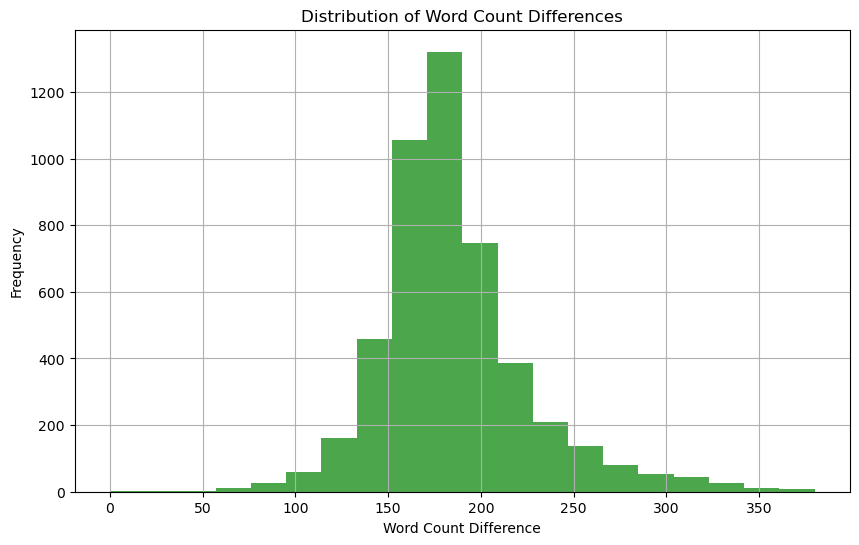

In [19]:
# 'new'와 'old' 열의 각 행별 단어 수 차이 계산
data['word_count_difference'] = data['new'].str.split().apply(len) - data['old'].str.split().apply(len)

# 단어 수 차이의 최솟값, 최댓값, 평균값, 중간값 계산
min_diff = data['word_count_difference'].min()
max_diff = data['word_count_difference'].max()
mean_diff = data['word_count_difference'].mean()
median_diff = data['word_count_difference'].median()

print(f"Minimum difference: {min_diff}")
print(f"Maximum difference: {max_diff}")
print(f"Average difference: {mean_diff}")
print(f"Median difference: {median_diff}")

# 단어 수 차이의 분포를 히스토그램으로 나타내기
plt.figure(figsize=(10, 6))
plt.hist(data['word_count_difference'], bins=20, color='green', alpha=0.7)
plt.title('Distribution of Word Count Differences')
plt.xlabel('Word Count Difference')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [21]:
# CSV 파일 경로
# file_path = './Data/training_old_new_data.csv'

# CSV 파일을 데이터프레임으로 불러오기
# data = pd.read_csv(file_path)

# 'new'와 'old' 열의 각 행별 단어 수 차이 계산
data['word_count_difference'] = data['new'].str.split().apply(len) - data['old'].str.split().apply(len)

# 단어 수 차이의 중간값 계산
median_diff = data['word_count_difference'].median()

# 중간값과의 절대 차이 계산
data['diff_from_median'] = abs(data['word_count_difference'] - median_diff)

# 중간값과 가장 가까운 순서대로 정렬하고 상위 100개 행 추출
closest_to_median = data.nsmallest(1000, 'diff_from_median')

# 원본 데이터에 'file_path' 열이 없다면, 이 부분을 생략하세요.
if 'file_path' not in data.columns:
    data['file_path'] = file_path

# 'file_path', 'new', 'old' 열로 구성된 새로운 데이터프레임 생성
result_df = closest_to_median[['file_path', 'new', 'old']]

# 결과 출력
print(result_df)

                                              file_path  \
102   ./data/training/REPORT-literature-01895-01895....   
247   ./data/training/REPORT-literature-01306-01306....   
284   ./data/training/REPORT-literature-02927-02927....   
289   ./data/training/REPORT-literature-01565-01565....   
303   ./data/training/REPORT-literature-03378-03378....   
...                                                 ...   
1808  ./data/training/REPORT-literature-01988-01988....   
1822  ./data/training/REPORT-literature-05181-05181....   
1825  ./data/training/REPORT-literature-04769-04769....   
1843  ./data/training/REPORT-literature-01437-01437....   
1864  ./data/training/REPORT-literature-05053-05053....   

                                                    new  \
102    그러나 그들에게는 그대로 C촌이나 예전 고향으로 돌아갈 면목이 없다. 그 런 것을...   
247    한식 경이나 지난 후에 과연 성축 밑으로서 산을 향하여 올라 오면서 두런 거리는 ...   
284    "요새 세밑이 돼서 도적놈이 다니니 들창 덧문 같은 것도 단단히 걸고 주 무십시오...   
289   탈출기 1 김군! 수삼 차 편지는 반갑게 받았다. 그러나 한 번도 회답치 못하였다....

In [23]:
# 먼저 result_df의 명시적인 복사본을 생성
result_df = result_df.copy()

# 'gptinput' 열 생성
result_df['gptinput'] = '문단1. ' + result_df['old'] + '\n\n문단2. ' + result_df['new'] + \
                        '\n\n문단1에서 문단2로 변경되었을 때, 추가된 내용을 50자 이내의 한 문장으로 요약해 줘.'

# 'gptoutput' 빈 열 생성
result_df['gptoutput'] = None

result_df


,file_path,new,old,gptinput,gptoutput
102,./data/training/REPORT-literature-01895-01895....,그러나 그들에게는 그대로 C촌이나 예전 고향으로 돌아갈 면목이 없다. 그 런 것을...,그러나 그들에게는 그대로 C촌이나 예전 고향으로 돌아갈 면목이 없다. 그 런 것을...,문단1. 그러나 그들에게는 그대로 C촌이나 예전 고향으로 돌아갈 면목이 없다. 그...,None
247,./data/training/REPORT-literature-01306-01306....,한식 경이나 지난 후에 과연 성축 밑으로서 산을 향하여 올라 오면서 두런 거리는 ...,한식 경이나 지난 후에 과연 성축 밑으로서 산을 향하여 올라 오면서 두런 거리는 ...,문단1. 한식 경이나 지난 후에 과연 성축 밑으로서 산을 향하여 올라 오면서 두런...,None
284,./data/training/REPORT-literature-02927-02927....,"""요새 세밑이 돼서 도적놈이 다니니 들창 덧문 같은 것도 단단히 걸고 주 무십시오...","""요새 세밑이 돼서 도적놈이 다니니 들창 덧문 같은 것도 단단히 걸고 주 무십시오...","문단1. ""요새 세밑이 돼서 도적놈이 다니니 들창 덧문 같은 것도 단단히 걸고 주...",None
289,./data/training/REPORT-literature-01565-01565....,탈출기 1 김군! 수삼 차 편지는 반갑게 받았다. 그러나 한 번도 회답치 못하였다....,탈출기 1 김군! 수삼 차 편지는 반갑게 받았다. 그러나 한 번도 회답치 못하였다.,문단1. 탈출기 1 김군! 수삼 차 편지는 반갑게 받았다. 그러나 한 번도 회답치 ...,None
303,./data/training/REPORT-literature-03378-03378....,팔패는 마음대로 떨어졌다. 떨어진 팔패와 같이 며느리의 마음은 과연 그 렇게 굳어...,팔패는 마음대로 떨어졌다. 떨어진 팔패와 같이 며느리의 마음은 과연 그 렇게 굳어...,문단1. 팔패는 마음대로 떨어졌다. 떨어진 팔패와 같이 며느리의 마음은 과연 그 ...,None
...,...,...,...,...,...
1808,./data/training/REPORT-literature-01988-01988....,‘저쪽이 완력과 세력으로 달겨들면 이쪽은 지력이다. 누가 이기나. 최후의 승리자의 ...,‘저쪽이 완력과 세력으로 달겨들면 이쪽은 지력이다. 누가 이기나.,문단1. ‘저쪽이 완력과 세력으로 달겨들면 이쪽은 지력이다. 누가 이기나.\n\n문...,None
1822,./data/training/REPORT-literature-05181-05181....,"그리고 또한 현대 청년은 많이 방황하고 고민한다고 하는데, 그들은 고답 주의에도 ...","그리고 또한 현대 청년은 많이 방황하고 고민한다고 하는데, 그들은 고답 주의에도 ...","문단1. 그리고 또한 현대 청년은 많이 방황하고 고민한다고 하는데, 그들은 고답 ...",None
1825,./data/training/REPORT-literature-04769-04769....,왕정정 군의 회상(수필) 중국인 왕정정 군이 서울에 오기는 1921년 겨울이다. 동...,왕정정 군의 회상(수필) 중국인 왕정정 군이 서울에 오기는 1921년 겨울이다. 동...,문단1. 왕정정 군의 회상(수필) 중국인 왕정정 군이 서울에 오기는 1921년 겨울...,None
1843,./data/training/REPORT-literature-01437-01437....,“아니오. 좀 바쁜 일이 있어서 가야겠어요.” “너는 밤낮 바쁜 일이 무어냐? 암만...,“아니오. 좀 바쁜 일이 있어서 가야겠어요.”,문단1. “아니오. 좀 바쁜 일이 있어서 가야겠어요.”\n\n문단2. “아니오. 좀...,None


In [24]:
result_df.shape

(1000, 5)

In [26]:
#csv파일로 저장
csv_file_path = './Data/training_data_chatgptin.csv'
result_df.to_csv(csv_file_path, index=False)

## data preprocessing

gptoutput이 있는 상태에서 수행

In [7]:
import pandas as pd
import difflib

In [4]:
# CSV 파일 경로
file_path = "./data/training_data_chatgptin.csv"

# CSV 파일을 데이터프레임으로 불러오기
df = pd.read_csv(file_path)
# df = df.head(200)

# 데이터프레임 확인
df.head()


,file_path,new,old,gptinput,gptoutput
0,./data/training/REPORT-literature-01895-01895....,그러나 그들에게는 그대로 C촌이나 예전 고향으로 돌아갈 면목이 없다. 그 런 것을...,그러나 그들에게는 그대로 C촌이나 예전 고향으로 돌아갈 면목이 없다. 그 런 것을...,문단1. 그러나 그들에게는 그대로 C촌이나 예전 고향으로 돌아갈 면목이 없다. 그...,그들의 절망적인 상황과 불확실한 미래에 대한 고민이 추가됨.
1,./data/training/REPORT-literature-01306-01306....,한식 경이나 지난 후에 과연 성축 밑으로서 산을 향하여 올라 오면서 두런 거리는 ...,한식 경이나 지난 후에 과연 성축 밑으로서 산을 향하여 올라 오면서 두런 거리는 ...,문단1. 한식 경이나 지난 후에 과연 성축 밑으로서 산을 향하여 올라 오면서 두런...,상동이 송장을 발견하고 두려움을 느끼며 상황을 관찰하는 내용이 추가됨.
2,./data/training/REPORT-literature-02927-02927....,"""요새 세밑이 돼서 도적놈이 다니니 들창 덧문 같은 것도 단단히 걸고 주 무십시오...","""요새 세밑이 돼서 도적놈이 다니니 들창 덧문 같은 것도 단단히 걸고 주 무십시오...","문단1. ""요새 세밑이 돼서 도적놈이 다니니 들창 덧문 같은 것도 단단히 걸고 주...","잠을 자다가 들리는 소리에 깨어난 후, 열린 창문을 발견하는 내용이 추가됨."
3,./data/training/REPORT-literature-01565-01565....,탈출기 1 김군! 수삼 차 편지는 반갑게 받았다. 그러나 한 번도 회답치 못하였다....,탈출기 1 김군! 수삼 차 편지는 반갑게 받았다. 그러나 한 번도 회답치 못하였다.,문단1. 탈출기 1 김군! 수삼 차 편지는 반갑게 받았다. 그러나 한 번도 회답치 ...,김군이 박군의 가족 방황을 우려하며 탈출을 반대하는 내용이 추가됨.
4,./data/training/REPORT-literature-03378-03378....,팔패는 마음대로 떨어졌다. 떨어진 팔패와 같이 며느리의 마음은 과연 그 렇게 굳어...,팔패는 마음대로 떨어졌다. 떨어진 팔패와 같이 며느리의 마음은 과연 그 렇게 굳어...,문단1. 팔패는 마음대로 떨어졌다. 떨어진 팔패와 같이 며느리의 마음은 과연 그 ...,집을 팔고 새로운 생활 계획을 논의하는 내용이 추가됨.


In [8]:
# 변화를 감지하여 토큰화된 텍스트 생성하는 함수
def detect_changes(old_text, new_text):
    added_parts = []
    for diff in difflib.ndiff(old_text, new_text):
        if diff[0] == '+':
            added_parts.append(diff[2:])
    return old_text + "[ADDED]" + "".join(added_parts) + "[/ADDED]"

# 'text' 열에 변화를 감지한 텍스트 추가
df['text'] = df.apply(lambda row: detect_changes(row['old'], row['new']), axis=1)

# 결과 확인
df

,file_path,new,old,gptinput,gptoutput,text
0,./data/training/REPORT-literature-01895-01895....,그러나 그들에게는 그대로 C촌이나 예전 고향으로 돌아갈 면목이 없다. 그 런 것을...,그러나 그들에게는 그대로 C촌이나 예전 고향으로 돌아갈 면목이 없다. 그 런 것을...,문단1. 그러나 그들에게는 그대로 C촌이나 예전 고향으로 돌아갈 면목이 없다. 그...,그들의 절망적인 상황과 불확실한 미래에 대한 고민이 추가됨.,그러나 그들에게는 그대로 C촌이나 예전 고향으로 돌아갈 면목이 없다. 그 런 것을...
1,./data/training/REPORT-literature-01306-01306....,한식 경이나 지난 후에 과연 성축 밑으로서 산을 향하여 올라 오면서 두런 거리는 ...,한식 경이나 지난 후에 과연 성축 밑으로서 산을 향하여 올라 오면서 두런 거리는 ...,문단1. 한식 경이나 지난 후에 과연 성축 밑으로서 산을 향하여 올라 오면서 두런...,상동이 송장을 발견하고 두려움을 느끼며 상황을 관찰하는 내용이 추가됨.,한식 경이나 지난 후에 과연 성축 밑으로서 산을 향하여 올라 오면서 두런 거리는 ...
2,./data/training/REPORT-literature-02927-02927....,"""요새 세밑이 돼서 도적놈이 다니니 들창 덧문 같은 것도 단단히 걸고 주 무십시오...","""요새 세밑이 돼서 도적놈이 다니니 들창 덧문 같은 것도 단단히 걸고 주 무십시오...","문단1. ""요새 세밑이 돼서 도적놈이 다니니 들창 덧문 같은 것도 단단히 걸고 주...","잠을 자다가 들리는 소리에 깨어난 후, 열린 창문을 발견하는 내용이 추가됨.","""요새 세밑이 돼서 도적놈이 다니니 들창 덧문 같은 것도 단단히 걸고 주 무십시오..."
3,./data/training/REPORT-literature-01565-01565....,탈출기 1 김군! 수삼 차 편지는 반갑게 받았다. 그러나 한 번도 회답치 못하였다....,탈출기 1 김군! 수삼 차 편지는 반갑게 받았다. 그러나 한 번도 회답치 못하였다.,문단1. 탈출기 1 김군! 수삼 차 편지는 반갑게 받았다. 그러나 한 번도 회답치 ...,김군이 박군의 가족 방황을 우려하며 탈출을 반대하는 내용이 추가됨.,탈출기 1 김군! 수삼 차 편지는 반갑게 받았다. 그러나 한 번도 회답치 못하였다....
4,./data/training/REPORT-literature-03378-03378....,팔패는 마음대로 떨어졌다. 떨어진 팔패와 같이 며느리의 마음은 과연 그 렇게 굳어...,팔패는 마음대로 떨어졌다. 떨어진 팔패와 같이 며느리의 마음은 과연 그 렇게 굳어...,문단1. 팔패는 마음대로 떨어졌다. 떨어진 팔패와 같이 며느리의 마음은 과연 그 ...,집을 팔고 새로운 생활 계획을 논의하는 내용이 추가됨.,팔패는 마음대로 떨어졌다. 떨어진 팔패와 같이 며느리의 마음은 과연 그 렇게 굳어...
...,...,...,...,...,...,...
195,./data/training/REPORT-literature-01326-01326....,“괜찮아. 내가 뭐 무서운가?” 그녀는 마루 끝에 걸터앉아 명호를 끌어다가 무릎 앞...,“괜찮아. 내가 뭐 무서운가?”,문단1. “괜찮아. 내가 뭐 무서운가?”\n\n문단2. “괜찮아. 내가 뭐 무서운가...,박영애가 명호에게 과자를 주며 아버지의 귀가를 기다림.,“괜찮아. 내가 뭐 무서운가?”[ADDED] 그녀는 마루 끝에 걸터앉아 명호를 끌어...
196,./data/training/REPORT-literature-02182-02182....,“그래 논은 금년에 떼웠나?” 한참 만에 나는 이렇게 물었다. “응……” “조합 같...,“그래 논은 금년에 떼웠나?” 한참 만에 나는 이렇게 물었다.,문단1. “그래 논은 금년에 떼웠나?” 한참 만에 나는 이렇게 물었다.\n\n문단...,"농민의 어려운 생활과 조합 부재, 가족 생계를 위한 편지 내용 추가됨.",“그래 논은 금년에 떼웠나?” 한참 만에 나는 이렇게 물었다.[ADDED] “응…...
197,./data/training/REPORT-literature-03002-03002....,그는 노기와 한고로 말미아마 팔장을 찌르고는 덜덜 떠렀다. 농창이 난 버 선이라 ...,그는 노기와 한고로 말미아마 팔장을 찌르고는 덜덜 떠렀다. 농창이 난 버 선이라 ...,문단1. 그는 노기와 한고로 말미아마 팔장을 찌르고는 덜덜 떠렀다. 농창이 난 버...,"그의 괴로움, 안해에 대한 반감, 어려운 생활 조건이 추가됨.",그는 노기와 한고로 말미아마 팔장을 찌르고는 덜덜 떠렀다. 농창이 난 버 선이라 ...
198,./data/training/REPORT-literature-03681-03681....,"""유쾌한 아가씬데요."" ""유쾌해 뵈요?"" ""종달새 같은 아가씹 니다."" ""고마워요...","""유쾌한 아가씬데요."" ""유쾌해 뵈요?","문단1. ""유쾌한 아가씬데요."" ""유쾌해 뵈요?\n\n문단2. ""유쾌한 아가씬데...",은주와 운전수의 유쾌하면서도 불안정한 대화가 추가됨.,"""유쾌한 아가씬데요."" ""유쾌해 뵈요?[ADDED]"" ""종달새 같은 아가씹 니다...."


In [9]:
# 'file_path', 'new', 'old', 'gptinput' 열 삭제
df.drop(columns=['file_path', 'new', 'old', 'gptinput'], inplace=True)

# 'gptoutput' 열 이름을 'summary'로 변경
df.rename(columns={'gptoutput': 'summary'}, inplace=True)

df

,summary,text
0,그들의 절망적인 상황과 불확실한 미래에 대한 고민이 추가됨.,그러나 그들에게는 그대로 C촌이나 예전 고향으로 돌아갈 면목이 없다. 그 런 것을...
1,상동이 송장을 발견하고 두려움을 느끼며 상황을 관찰하는 내용이 추가됨.,한식 경이나 지난 후에 과연 성축 밑으로서 산을 향하여 올라 오면서 두런 거리는 ...
2,"잠을 자다가 들리는 소리에 깨어난 후, 열린 창문을 발견하는 내용이 추가됨.","""요새 세밑이 돼서 도적놈이 다니니 들창 덧문 같은 것도 단단히 걸고 주 무십시오..."
3,김군이 박군의 가족 방황을 우려하며 탈출을 반대하는 내용이 추가됨.,탈출기 1 김군! 수삼 차 편지는 반갑게 받았다. 그러나 한 번도 회답치 못하였다....
4,집을 팔고 새로운 생활 계획을 논의하는 내용이 추가됨.,팔패는 마음대로 떨어졌다. 떨어진 팔패와 같이 며느리의 마음은 과연 그 렇게 굳어...
...,...,...
195,박영애가 명호에게 과자를 주며 아버지의 귀가를 기다림.,“괜찮아. 내가 뭐 무서운가?”[ADDED] 그녀는 마루 끝에 걸터앉아 명호를 끌어...
196,"농민의 어려운 생활과 조합 부재, 가족 생계를 위한 편지 내용 추가됨.",“그래 논은 금년에 떼웠나?” 한참 만에 나는 이렇게 물었다.[ADDED] “응…...
197,"그의 괴로움, 안해에 대한 반감, 어려운 생활 조건이 추가됨.",그는 노기와 한고로 말미아마 팔장을 찌르고는 덜덜 떠렀다. 농창이 난 버 선이라 ...
198,은주와 운전수의 유쾌하면서도 불안정한 대화가 추가됨.,"""유쾌한 아가씬데요."" ""유쾌해 뵈요?[ADDED]"" ""종달새 같은 아가씹 니다...."


In [10]:
#csv파일로 저장
csv_file_path = '../data/training_data_200.csv'
df.to_csv(csv_file_path, index=False)